In [46]:
# Read this /content/DATA_CLEANED.xlsx data in pandas

import pandas as pd

df = pd.read_excel('/content/DATA_CLEANED.xlsx')
print(df)


     Mkoa (Region) Bidhaa (Products)  Idadi Iliyouzwa (Total Sales)  \
0           Kagera            Mchele                            293   
1           Kagera            Maziwa                            555   
2           Kagera            Mchele                            579   
3           Kagera            Mchele                            983   
4           Kagera           Mahindi                           1118   
...            ...               ...                            ...   
1290     Shinyanga            Maziwa                           2487   
1291     Shinyanga            Mchele                           2750   
1292     Shinyanga            Mchele                           2750   
1293     Shinyanga            Mchele                           2750   
1294     Shinyanga           Mahindi                           3422   

      Gharama (Cost)  Mapato ( Net Income)  Faida (Profit)  Tarehe (Date)  
0               2450                717850        128845.5          438

In [5]:
# Remove duplicates

df.drop_duplicates(inplace=True)
print(df)


     Mkoa (Region) Bidhaa (Products)  Idadi Iliyouzwa (Total Sales)  \
0           Kagera            Mchele                            293   
1           Kagera            Maziwa                            555   
2           Kagera            Mchele                            579   
3           Kagera            Mchele                            983   
4           Kagera           Mahindi                           1118   
...            ...               ...                            ...   
1287     Shinyanga           Mahindi                           2155   
1289     Shinyanga           Mahindi                           2487   
1290     Shinyanga            Maziwa                           2487   
1291     Shinyanga            Mchele                           2750   
1294     Shinyanga           Mahindi                           3422   

      Gharama (Cost)  Mapato ( Net Income)  Faida (Profit)  Tarehe (Date)  
0               2450                717850        128845.5          438

In [2]:
df.columns

Index(['Mkoa (Region)', 'Bidhaa (Products)', 'Idadi Iliyouzwa (Total Sales)',
       'Gharama (Cost)', 'Mapato ( Net Income)', 'Faida (Profit)',
       'Tarehe (Date)'],
      dtype='object')

# Multivariable Analysis

In [49]:
# Step 1: Data Preparation
df = pd.read_excel('/content/DATA_CLEANED.xlsx')


import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")




In [69]:
# Step 2: Psychographic Segmentation
# Implement clustering or factor analysis to segment customers based on psychographic variables


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Assuming you have some hypothetical psychographic data
psychographic_data = {
    'Personality': [3, 1, 2, 5, 4],
    'Values': [2, 3, 4, 1, 5],
    'Interests': [1, 2, 3, 4, 5],
    'Lifestyle': [5, 4, 3, 2, 1]
}

# Assuming the original dataset is stored in 'data' DataFrame
data = pd.read_excel('/content/DATA_CLEANED.xlsx')

# Combine datasets
combined_data = pd.concat([data, pd.DataFrame(psychographic_data)], axis=1)

# Separate numeric and non-numeric columns
numeric_columns = combined_data.select_dtypes(include=['number']).columns
non_numeric_columns = combined_data.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns with mean
imputer_numeric = SimpleImputer(strategy='mean')
combined_data[numeric_columns] = imputer_numeric.fit_transform(combined_data[numeric_columns])

# Impute missing values for non-numeric columns with mode
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
combined_data[non_numeric_columns] = imputer_non_numeric.fit_transform(combined_data[non_numeric_columns])

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data[numeric_columns])

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
combined_data['Cluster'] = clusters

# Optionally, you can analyze the clusters further to understand their characteristics
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_columns)

print(cluster_centers_df)


   Idadi Iliyouzwa (Total Sales)  Gharama (Cost)  Mapato ( Net Income)  \
0                    1697.332255     1300.282943          2.171280e+06   
1                    1118.000000      500.000000          5.590000e+05   
2                    1880.333333    18700.000000          3.516223e+07   

   Faida (Profit)  Tarehe (Date)  Personality    Values  Interests  Lifestyle  
0    3.906354e+05   44017.755053     2.999192  2.998383   2.998383   3.001617  
1    1.005450e+05   43831.000000     4.000000  5.000000   5.000000   1.000000  
2    6.326397e+06   44027.929825     3.000000  3.000000   3.000000   3.000000  


In [70]:
# Step 3: Multivariable Analysis
# # Implement regression analysis or other techniques to analyze relationships between variables

import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming the original dataset is stored in 'data' DataFrame
data = pd.read_excel('/content/DATA_CLEANED.xlsx')

# Select relevant columns for analysis
selected_columns = ['Idadi Iliyouzwa (Total Sales)', 'Gharama (Cost)', 'Mapato ( Net Income)', 'Faida (Profit)']
analysis_data = data[selected_columns]

# Drop rows with missing values
analysis_data = analysis_data.dropna()

# Define independent and dependent variables
X = analysis_data[['Gharama (Cost)', 'Mapato ( Net Income)']]  # Independent variables
y = analysis_data['Faida (Profit)']  # Dependent variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Faida (Profit)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.844e+33
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        13:10:43   Log-Likelihood:                 25285.
No. Observations:                1295   AIC:                        -5.056e+04
Df Residuals:                    1292   BIC:                        -5.055e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -8.94e-10 

In [71]:
 # Step 4: A/B/C/D/E/F/G Testing
 # Design experiments and perform hypothesis testing to measure the impact of different treatments
# Interpret the results if any

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Assuming your original dataset is stored in 'data' DataFrame
data = pd.read_excel('/content/DATA_CLEANED.xlsx')

# Define treatments and assign users to groups randomly
treatments = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data['Group'] = np.random.choice(treatments, size=len(data))

# Define key metrics to measure
key_metric = 'Idadi Iliyouzwa (Total Sales)'

# Perform hypothesis testing
group_means = data.groupby('Group')[key_metric].mean()
group_counts = data.groupby('Group').size()

# Compare each group with every other group using t-test
for i in range(len(treatments)):
    for j in range(i + 1, len(treatments)):
        group1 = data[data['Group'] == treatments[i]][key_metric]
        group2 = data[data['Group'] == treatments[j]][key_metric]
        t_stat, p_value = ttest_ind(group1, group2)
        rounded_p_value = round(p_value, 4)
        print(f"T-Test between Group {treatments[i]} and Group {treatments[j]}: p-value = {rounded_p_value}")


T-Test between Group A and Group B: p-value = 0.6334
T-Test between Group A and Group C: p-value = 0.3867
T-Test between Group A and Group D: p-value = 0.0227
T-Test between Group A and Group E: p-value = 0.3274
T-Test between Group A and Group F: p-value = 0.9031
T-Test between Group A and Group G: p-value = 0.9582
T-Test between Group B and Group C: p-value = 0.2261
T-Test between Group B and Group D: p-value = 0.0089
T-Test between Group B and Group E: p-value = 0.1606
T-Test between Group B and Group F: p-value = 0.7183
T-Test between Group B and Group G: p-value = 0.683
T-Test between Group C and Group D: p-value = 0.3103
T-Test between Group C and Group E: p-value = 0.9467
T-Test between Group C and Group F: p-value = 0.3405
T-Test between Group C and Group G: p-value = 0.3833
T-Test between Group D and Group E: p-value = 0.1837
T-Test between Group D and Group F: p-value = 0.0165
T-Test between Group D and Group G: p-value = 0.0251
T-Test between Group E and Group F: p-value = 0

In [72]:
# Statistical Interpretation based on the above result

# Analyze the p-values obtained from the t-tests

significant_level = 0.05

for i in range(len(treatments)):
    for j in range(i + 1, len(treatments)):
        p_value = ttest_ind(data[data['Group'] == treatments[i]][key_metric], data[data['Group'] == treatments[j]][key_metric])[1]
        if p_value < significant_level:
            print(f"There is a statistically significant difference in {key_metric} between Group {treatments[i]} and Group {treatments[j]}.")
        else:
            print(f"There is no statistically significant difference in {key_metric} between Group {treatments[i]} and Group {treatments[j]}.")


There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group A and Group B.
There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group A and Group C.
There is a statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group A and Group D.
There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group A and Group E.
There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group A and Group F.
There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group A and Group G.
There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group B and Group C.
There is a statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group B and Group D.
There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group B and Group E.
The

The statement "**There is no statistically significant difference in Idadi Iliyouzwa (Total Sales) between Group A and Group B**" indicates that the p-value obtained from the t-test comparing the Total Sales of Group A and Group B is greater than the chosen significance level (commonly set at 0.05). Similarly, for Group A compared with Group C and Group D, the p-values are also greater than 0.05.

Thus, it implies that we fail to reject the null hypothesis in these comparisons. The null hypothesis in this context would be that there is no difference in Total Sales between the two groups. Since the p-values are greater than 0.05, we do not have sufficient evidence to conclude that there is a statistically significant difference in Total Sales between Group A and Group B, Group A and Group C, and Group A and Group D, et cetera.

In other words, based on the data and the statistical test performed, we cannot confidently say that the observed differences in Total Sales between these groups are not due to random chance. Therefore, we conclude that there is no statistically significant difference in Total Sales between Group A and each of Group B, Group C, and Group D.

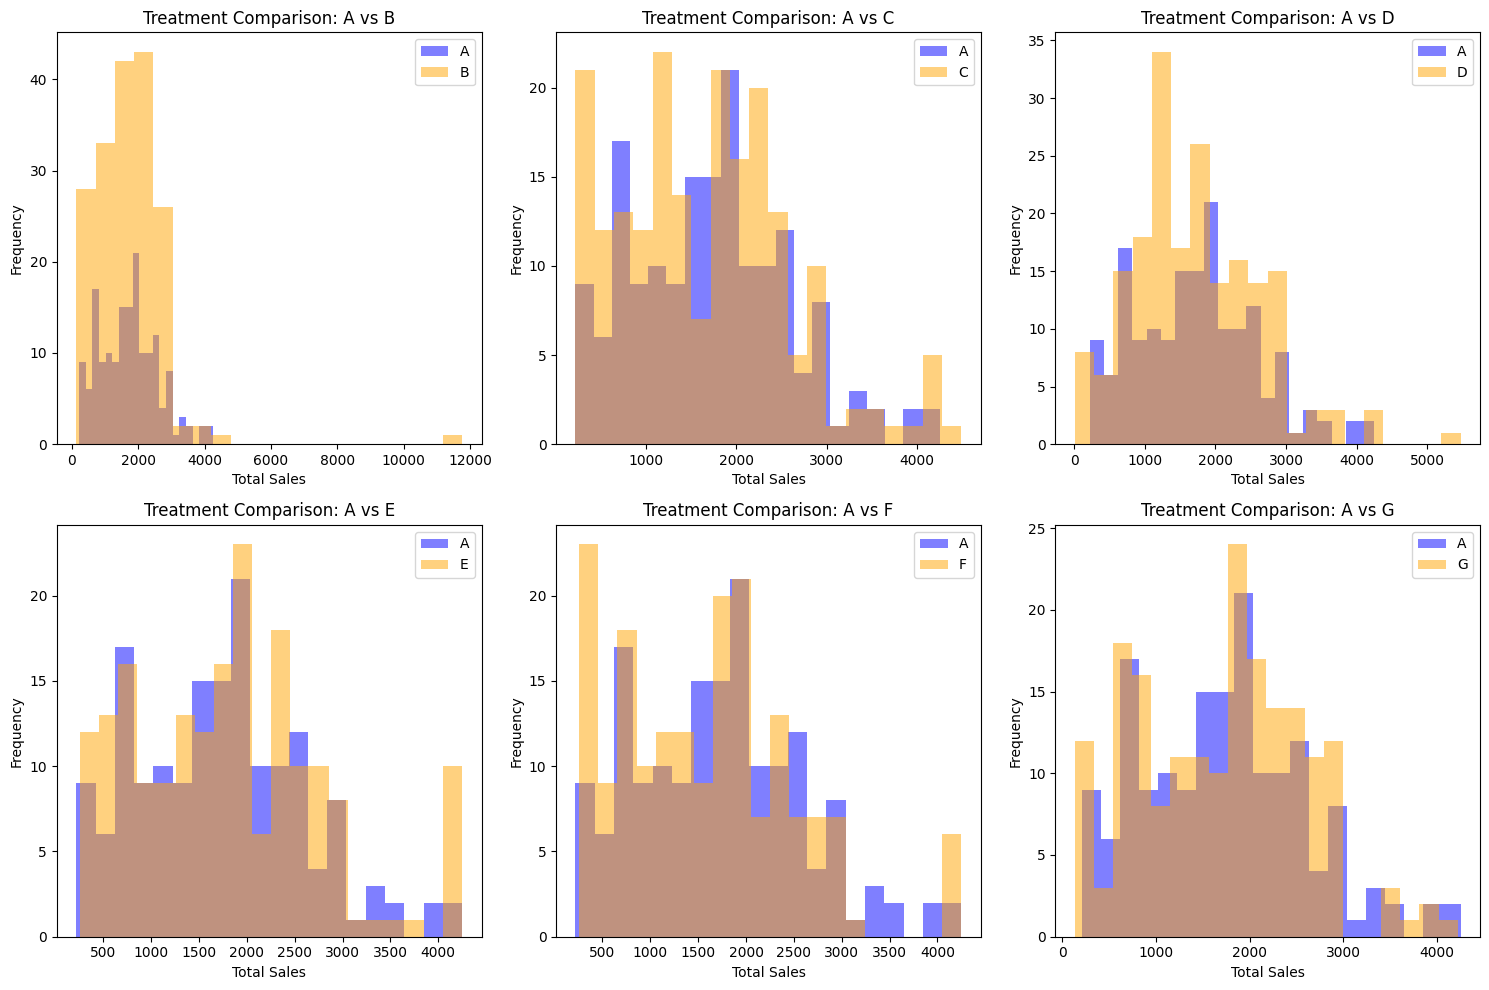

In [73]:
 # Step 5: Visualization
# # Visualize the results to gain insights and communicate findings effectively

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Assuming the original dataset is stored in 'data' DataFrame
data = pd.read_excel('/content/DATA_CLEANED.xlsx')

# Define treatments and assign users to groups randomly
treatments = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data['Group'] = np.random.choice(treatments, size=len(data))

# Define key metric to measure
key_metric = 'Idadi Iliyouzwa (Total Sales)'

# Perform hypothesis testing
group_means = data.groupby('Group')[key_metric].mean()
group_counts = data.groupby('Group').size()

# Calculate the number of comparisons
num_comparisons = len(treatments) * (len(treatments) - 1) // 2

# Initialize subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Compare each group with every other group using t-test
plot_idx = 0
for i in range(len(treatments)):
    for j in range(i + 1, len(treatments)):
        if plot_idx < len(axes):  # Check if plot_idx is within bounds
            group1 = data[data['Group'] == treatments[i]][key_metric]
            group2 = data[data['Group'] == treatments[j]][key_metric]
            t_stat, p_value = ttest_ind(group1, group2)

            # Plot histogram for each pair of groups
            axes[plot_idx].hist(group1, alpha=0.5, label=treatments[i], color='blue', bins=20)
            axes[plot_idx].hist(group2, alpha=0.5, label=treatments[j], color='orange', bins=20)
            axes[plot_idx].set_title(f'Treatment Comparison: {treatments[i]} vs {treatments[j]}')
            axes[plot_idx].legend()
            axes[plot_idx].set_xlabel('Total Sales')
            axes[plot_idx].set_ylabel('Frequency')

        plot_idx += 1

# Hide empty subplot(s) if necessary
for ax in axes[plot_idx:]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()





Based on the obtained visualization, we can observe the following;

1. **Distribution of Total Sales**
    - Each histogram represents the distribution of Total Sales for a specific pair of treatment groups.
    - The overlapping areas between the histograms indicate the similarities in Total Sales distribution between those groups.
    - Differences in the shapes and peaks of the histograms suggest potential variations in Total Sales across different treatment groups.

2. **Comparison of Group Means**
    - Visually compare the centers of the histograms for each treatment group.
    - Groups with statistically significant differences in Total Sales will exhibit visibly different mean values.
    - For example, if the histograms for Group A and Group B show non-overlapping distributions, it suggests a potential difference in their average Total Sales.